# Imports

This Lab uses numpy, matplotlib, pillow, pandas, scipy, scikit-learn and scikit-image.

In [10]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
print(1)

1


In [11]:
df=pd.read_csv("spotify_history.csv")
arrShuffle=df["shuffle"]
arrReason_End=df["reason_end"]
arrMs_Played=df["ms_played"]
arrReason_Start=df["reason_start"]

i=0
print(len(arrReason_End))
for x in range(len(arrReason_End)):
    if(arrReason_End[x]=="trackdone"):
        arrReason_End[x]=1
        i+=1
    else:
        arrReason_End[x]=0
print(i)


149860


C:\Users\maxim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\maxim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


77194


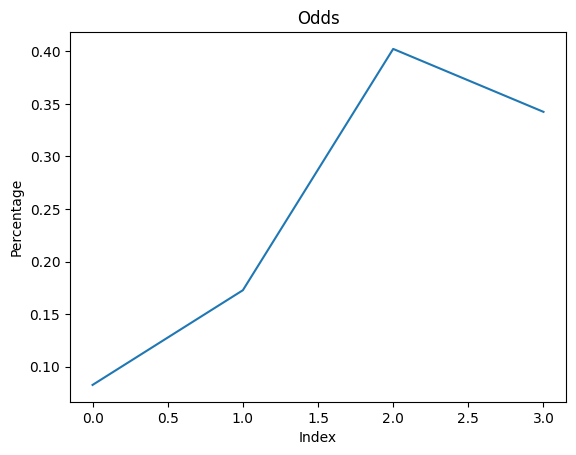

In [ ]:


odds=[0,0,0,0]
odds[0]=0
odds[1]=0
odds[2]=0
odds[3]=0
for x in range(len(arrShuffle)):
    if(arrShuffle[x]==arrShuffle[0] and arrReason_End[x]==0):
        odds[0]+=1
    elif(arrShuffle[x]==arrShuffle[0] and arrReason_End[x]==1):
        odds[1]+=1
    elif(arrShuffle[x]!=arrShuffle[0] and arrReason_End[x]==0):
        odds[2]+=1
    else:
        odds[3]+=1
odds[0]=odds[0]/len(arrShuffle)
odds[1]=odds[1]/len(arrShuffle)
odds[2]=odds[2]/len(arrShuffle)
odds[3]=odds[3]/len(arrShuffle)

plt.plot(range(len(odds)),odds)
plt.xlabel("Index")
plt.ylabel("Percentage")
plt.title("Odds")

plt.show()


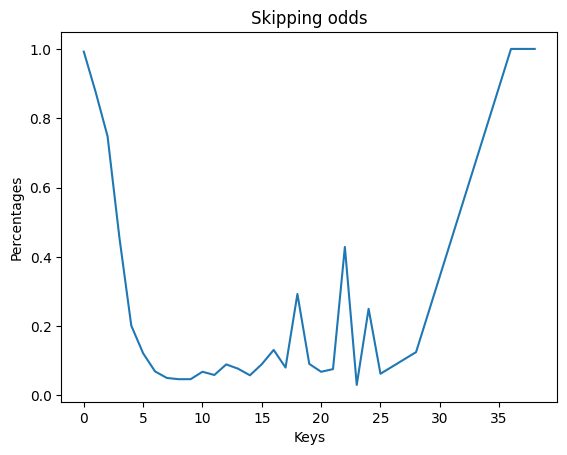

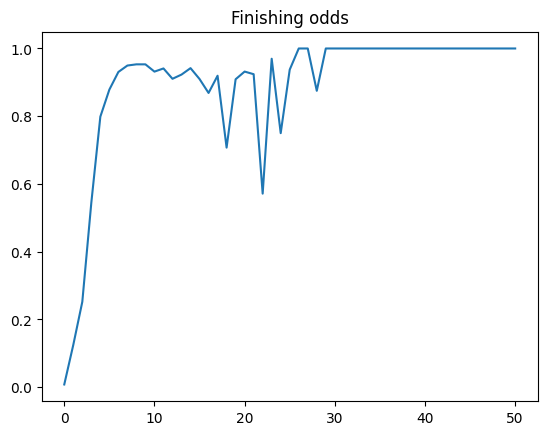

In [40]:
skippedMS={}
finishedMS={}

for x in range(len(arrMs_Played)):
    if(arrReason_End[x]==1):
        if(arrMs_Played[x]//31222.5 not in finishedMS):
            finishedMS.update({arrMs_Played[x]//31222.5:1})
        else:
            finishedMS[arrMs_Played[x]//31222.5]+=1
    else:
        if(arrMs_Played[x]//31222.5 not in skippedMS):
            skippedMS.update({arrMs_Played[x]//31222.5:1})
        else:
            skippedMS[arrMs_Played[x]//31222.5]+=1

arr1=list(skippedMS.keys())
arr1=sorted(arr1)
arr2=list(finishedMS.keys())
arr2=sorted(arr2)
arr3={}
arr4={}

for x in arr1:
    if x in arr2:
        arr3.update({x:skippedMS[x]/(skippedMS[x]+finishedMS[x])})
    else:
        arr3.update({x:1})

for x in arr2:
    if x in arr1:
        arr4.update({x:finishedMS[x]/(skippedMS[x]+finishedMS[x])})
    else:
        arr4.update({x:1})



plt.plot(list(arr3.keys()),list(arr3.values()))
plt.xlabel("Keys")
plt.ylabel("Percentages")
plt.title("Skipping odds")

plt.show()

plt.plot(list(arr4.keys()),list(arr4.values()))
plt.title("Finishing odds")
plt.show()